In [3]:

import math
import random
import matplotlib.pyplot as plt
import asyncio
import time
import numpy as np
from sympy import *
from matplotlib.ticker import MaxNLocator


In [4]:

def DDA(x1, y1, x2, y2):
    dx, dy = x2 - x1, y2 - y1
    k = dy/dx
    x, y = x1, y1
    #网格线
    plt.grid()
    #x轴y轴数值取整
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
    #绘点
    for i in range(0, int(abs(dx)+1)):
        #需要四舍五入
        plt.plot(int(round(x)), int(round(y)), 'b.', markersize = 1)
        x += 1
        y += float(k)
    plt.show()

def a_b(s,theta):
    a = np.random.normal(loc=math.sqrt(s),scale=0.5*theta)
    return a



In [5]:


if __name__ =="__main__":

    """
    以X(0,0)为坐标原点点,往右和上方向分别衍生 m 距离 和 n 距离
    打击中心点应该为(m/2,n/2)
    """
    # 总长度为 2*n ，总宽度为 2*m
    #m = int(input("请输入需要的横向精度:"))
    #n = int(input("请输入需要的纵向精度:"))
    #Hit = int(input("请输入打击等级:"))
    #Res = int(input("请输入目标材质等级:"))
    m = 100
    n = 200
    Hit = 3
    Res = 3

    theta = Hit/Res

    dm = 1
    dn = 1
    k = 500

    #r_array = [[0 for i in range(m)] for j in range(n)]
    #R_distance2 = [[0 for i in range(m)] for j in range(n)]
    #p_array = [[0 for i in range(m)] for j in range(n)]
    #X_array = [[0 for i in range(m)] for j in range(n)]

    R_distance2 = [[0.0 for _ in range(n)] for _ in range(m)]
    p_array = [[0.0 for _ in range(n)] for _ in range(m)]
    X_array = [[0.0 for _ in range(n)] for _ in range(m)]


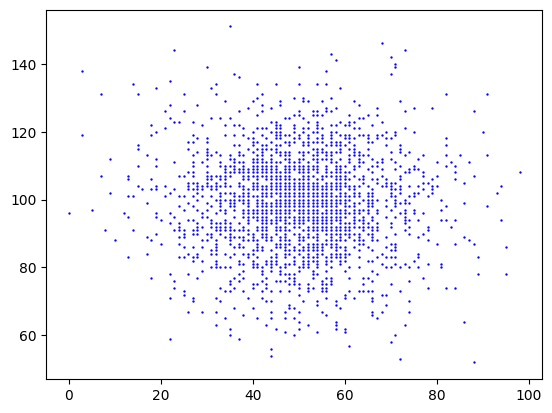

In [6]:


    for i in range(m):
        for j in range(n):
            R_distance2[i][j] = (dm*(i-(m-1)/2))**2+ (dn*(j-(n-1)/2))**2
            p_array[i][j] = math.exp(-R_distance2[i][j]/k/theta)
            X_array[i][j] = 1-int(random.random()+1-p_array[i][j])

    a_array = [[0.0 for _ in range(n)] for _ in range(m)]
    b_array = [[0.0 for _ in range(n)] for _ in range(m)]

    # 对状态为1的点的数量进行统计
    number_for1 = 0   #初始化
    # 定义一个新的矩阵存储碎片面积
    s = [[0.0 for _ in range(n)] for _ in range(m)]
    z = 0
    for i in range(m):
        for j in range(n):
            if X_array[i][j] == 1:
                plt.scatter(i , j , s = .5 ,color = 'b')


In [ ]:


    for i in range(m):
        for j in range(n):
            if X_array[i][j] == 1:
                plt.scatter(i , j , s = .5 ,color = 'b')
                number_for1 = number_for1 + 1
                #此处我想实现将状态为1的点的碎片面积存储到一个新的矩阵中
                R_distance2zero = math.sqrt((i)**2 + (j)**2)
                #此处函数表达式为正态分布概率密度函数的原函数（erf），借此求出状态为1的点生成的碎片面积
                #其中R_distance2zero为状态点相对参考坐标系原点的距离，后续的u即为状态点相对爆炸点的距离
                s[i][j] = (math.erf((R_distance2zero - (math.sqrt(R_distance2[i][j])))/ math.sqrt(2) /theta))/2
            else:
                s[i][j] = 0

    for i in range(m):
        for j in range(n):
            if (s[i][j]) :
                a_array[i][j] = a_b(s,theta)
                b_array[i][j] = s/(a_b(s,theta))
                #生成四个点
                #point1
                x1 = i*dm-a_array[i][j]/2
                y1 = random.uniform(j*dn-b_array[i][j]/2,j*dn+b_array[i][j]/2)
                #point2
                x2 = random.uniform(i*dm-a_array[i][j]/2,i*dm+a_array[i][j]/2)
                y2 = j*dn-b_array[i][j]/2
                #point3
                x3 = i*dm+a_array[i][j]/2
                y3 = random.uniform(j*dn-b_array[i][j]/2,j*dn+b_array[i][j]/2)
                #point4
                x4 = random.uniform(i*dm-a_array[i][j]/2,i*dm+a_array[i][j]/2)
                y4 = j*dn+b_array[i][j]/2

                #DDA算法line1
                x,y = x1,y1
                xEnd, yEnd = x2,y2
                if xEnd < x:
                    x,y, xEnd, yEnd = xEnd, yEnd, x, y
                DDA(x, y, xEnd, yEnd)
                #DDA算法line2
                x,y = x2,y2
                xEnd, yEnd = x3,y3
                if xEnd < x:
                    x,y, xEnd, yEnd = xEnd, yEnd, x, y
                DDA(x, y, xEnd, yEnd)
                #DDA算法line3
                x,y = x3,y3
                xEnd, yEnd = x4,y4
                if xEnd < x:
                    x,y, xEnd, yEnd = xEnd, yEnd, x, y
                DDA(x, y, xEnd, yEnd)
                #DDA算法line4
                x,y = x4,y4
                xEnd, yEnd = x1,y1
                if xEnd < x:
                    x,y, xEnd, yEnd = xEnd, yEnd, x, y
                DDA(x, y, xEnd, yEnd)









